# Bose–Hubbard Model 

The Hamiltonian of the one dimensional Bose–Hubbard model can be written as:


$$\hat{H} = -J \sum_{<i,j>} \left(\hat{a}_i^\dagger\hat{a}_j + \hat{a}_j^\dagger\hat{a}_i\right)
          + \frac{U}{2} \sum_{i=1}^M  \,\hat{n}_i \left(\hat{n}_i - 1\right)$$

where $\hat{a}_i^\dagger$ and $\hat{a}_i$ are creation and annihilation operators, and 
$\hat{n}_i=\hat{a}_i^\dagger\hat{a}_i$ is the particle number operator, $M$ is the total numbers of the sites. 
The kinetic part, $\hat{a}_i^\dagger\hat{a}_j$ means that one boson is annihilated at site $j$ and then created at site $i$, so the net effect is this boson hop from $j$-site to $i$-site. That’s why we call it <strong>hopping term</strong>. Summation indices $<ij>$ means that only neighboring lattice sites are considered, since the do not consider a long interaction between bosons.

The second part is the <strong>interaction term</strong>, which describes the on-site interaction of the boson. It has the same form as the electrostatic energy of $N$ electric charges. In the following article, we assume $U>0$ so that the interaction is repulsive, that is the reason of minus sign.

We can also consider a <strong>chemical potential</strong> $\mu$ term. If the chemical potential is fixed, then it will become a constant and we can simply ignore it.

To start, we can choose the occupation basis:

$|n_1,\, n_2, \, \ldots,\, n_i,\, \ldots,\, n_N>.$

Here, $N$ is the number of sites, while $M=\sum_{i=1}^N n_i$ is the total number of particles. Apply the operators on it, we have:

 
\begin{aligned}
   \vphantom{\hat{a}_i^\dagger}
   \hat{a}_i         \, |\ldots,\, n_i  ,\, \ldots>
   = \sqrt{n_i}        \, |\ldots,\, n_i-1,\, \ldots> \\
   \hat{a}_i^\dagger \, |\ldots,\, n_i  ,\, \ldots>
   = \sqrt{n_i+1}      \, |\ldots,\, n_i+1,\, \ldots> \\
   \vphantom{\hat{a}_i^\dagger}
   \hat{n}_i         \, |\ldots,\, n_i  ,\, \ldots>
    = n_i               \, |\ldots,\, n_i  ,\, \ldots>
\end{aligned}


## Simulation

In [393]:
using LinearAlgebra 
using Plots #Graph
using StaticArrays 
using SparseArrays 
using Arpack  #Eigenvalues and eigenvectors
using LaTeXStrings #Titles and labels 
using JLD #Save data
#definition of N,M,D
global N=10
global M=9
global D=Int((factorial(M+N-1))/(factorial(M-1)*factorial(N)))  

#i-prime number function(suggested form) 
p(i)=100i+3 

#Generate a basis for N = M
function generate_basis(N, M, D)
    #D = prod(max(N, M):N+M-1) ÷ prod(1:min(N, M))
    basis = [zeros(Int, M) for _ in 1:D]
    basis[1][1] = N
    for t = 2:D
        if basis[t-1][M] != 0
            k = M - 1
        else
            k = M
        end
        while k > 0 && basis[t-1][k] == 0
            k -= 1
        end
        @views basis[t][1:k-1] .= basis[t-1][1:k-1]
        basis[t][k] = basis[t-1][k] - 1
        basis[t][k+1] = N - sum(@view(basis[t][1:k])) 
        end 
    return basis 
end 
#if you are struggling with the lexicographic order, you can think this algorithm as a game of balls on different 
#sites, for example for 3 balls and 3 sites, you start with 3 in the first site, then 1 ball fall from 
#the first site and going to the second site and finally the ball which fallen moves to the third site
#and now you repeat the process of drop a ball on the first place and then move it on each site until the last.
#vplusone = generate_basis(N+1,M) 
v = generate_basis(N,M, D) 

43758-element Vector{Vector{Int64}}:
 [10, 0, 0, 0, 0, 0, 0, 0, 0]
 [9, 1, 0, 0, 0, 0, 0, 0, 0]
 [9, 0, 1, 0, 0, 0, 0, 0, 0]
 [9, 0, 0, 1, 0, 0, 0, 0, 0]
 [9, 0, 0, 0, 1, 0, 0, 0, 0]
 [9, 0, 0, 0, 0, 1, 0, 0, 0]
 [9, 0, 0, 0, 0, 0, 1, 0, 0]
 [9, 0, 0, 0, 0, 0, 0, 1, 0]
 [9, 0, 0, 0, 0, 0, 0, 0, 1]
 [8, 2, 0, 0, 0, 0, 0, 0, 0]
 [8, 1, 1, 0, 0, 0, 0, 0, 0]
 [8, 1, 0, 1, 0, 0, 0, 0, 0]
 [8, 1, 0, 0, 1, 0, 0, 0, 0]
 ⋮
 [0, 0, 0, 0, 0, 0, 1, 0, 9]
 [0, 0, 0, 0, 0, 0, 0, 10, 0]
 [0, 0, 0, 0, 0, 0, 0, 9, 1]
 [0, 0, 0, 0, 0, 0, 0, 8, 2]
 [0, 0, 0, 0, 0, 0, 0, 7, 3]
 [0, 0, 0, 0, 0, 0, 0, 6, 4]
 [0, 0, 0, 0, 0, 0, 0, 5, 5]
 [0, 0, 0, 0, 0, 0, 0, 4, 6]
 [0, 0, 0, 0, 0, 0, 0, 3, 7]
 [0, 0, 0, 0, 0, 0, 0, 2, 8]
 [0, 0, 0, 0, 0, 0, 0, 1, 9]
 [0, 0, 0, 0, 0, 0, 0, 0, 10]

In [394]:
#tag function
function tag(b,M)
    tag=0;
    for i in 1:M
        tag += (√p(i))*b[i] 
    end
    return tag 
end

tag (generic function with 1 method)

In [395]:
function creation_ann(k,j,v)     
    if(v[j] >= 1) 
        b = copy(v)
        value = sqrt(((b[k])+1)*b[j])
        b[j] -= 1; 
        b[k] += 1;    
        return [value , b]   
    else 
        return 0; 
    end 
end   

creation_ann (generic function with 1 method)

In [396]:
function matrixofcreationann(i,k)
    mat = spzeros(D,D)
    for j in 1:D 
        if creation_ann(i,k,v[j]) == 0 
           continue      
        end
        mat[DictOfInds[tag(creation_ann( i, k , v[j] )[2],M)], j] = creation_ann(i, k , v[j])[1] 
    end    
    return mat
end

matrixofcreationann (generic function with 1 method)

In [397]:
#Diagonal values of the occupation number
function valdiags(k, v, M)  
    if(v[k] >= 1)  
        return  (v[k]*(v[k]-1))/2  
    else 
        return 0;
    end  
end       

valdiags (generic function with 1 method)

In [398]:
function occupation(j, v) 
     if(v[j] >= 1)  
        return  v[j]  
    else 
        return 0;
    end  
end       

occupation (generic function with 1 method)

In [399]:
function matrixoccupation(k, D) 
    mat = spzeros(D,D)
    for j in 1:D 
        mat[j,j] = occupation(k, v[j]) 
    end   
    return mat 
end

matrixoccupation (generic function with 1 method)

In [400]:
creation_ann(3,1,v[1])

2-element Vector{Any}:
 3.1622776601683795
  [9, 0, 1, 0, 0, 0, 0, 0, 0]

In [401]:
#Array of tags 
T = []
for i in 1:length(v) 
     push!(T,  tag( v[i] , M )) 
end

In [402]:
#Order and we made a dictionary to Tsorted => indices
inds = sortperm(T);
Tsorted = T[inds];
#DictOfInds = Dict(zip(Tsorted, inds)) 
DictOfInds = Dict(Tsorted .=> inds)

Dict{Float64, Int64} with 43758 entries:
  240.367 => 38483
  241.024 => 34377
  218.167 => 20738
  250.252 => 22245
  265.121 => 39872
  187.78  => 2404
  191.623 => 31214
  204.305 => 5822
  244.254 => 34329
  194.994 => 5795
  214.638 => 25098
  250.768 => 39907
  226.767 => 34032
  183.211 => 6742
  206.547 => 17143
  217.509 => 17413
  206.768 => 29588
  232.709 => 38349
  226.502 => 23312
  241.441 => 23449
  272.078 => 43646
  215.672 => 32556
  167.595 => 735
  217.352 => 9513
  215.231 => 31064
  ⋮       => ⋮

In [310]:
diagscomp = [];
for j in 1:D 
    sumsdeocup = []; 
    for k in 1:M
        push!(sumsdeocup, valdiags(k, v[j], M))
    end  
    push!(diagscomp, sum(sumsdeocup))    
end   
#Mostramos la parte  
U=1
Vals = U*diagscomp
Hint = spzeros(D,D)
Hint[diagind(Hint)] = Vals; Hint  
J = 1 
Hkin = spzeros(D, D)
for j in 1:D, k in 1:M, m in 1:M   
    if creation_ann(k,m,v[j]) == 0 
        continue     
    elseif (abs(k-m)==(M-1) || abs(k-m)==1 ) ##Boundary condition 1->M, M->1            
    #   if(DictOfInds[tag(creation_ann( k, m , v[j] )[2],M)] < j)   #### up  part 
    #       Hkin[DictOfInds[tag(creation_ann( k, m , v[j] )[2],M)], j] = -J*(creation_ann( k, m , v[j])[1]) 
    #   end
        if(DictOfInds[tag(creation_ann( k, m , v[j] )[2],M)] > j) ### down  part 
            Hkin[DictOfInds[tag(creation_ann( k, m , v[j] )[2],M)], j] = -J*(creation_ann( k, m , v[j])[1]) 
        end      
    end   
end     


Hkin = Symmetric(Hkin, :L) 

H=Hkin+Hint
#spy(H, markersize = 1)

35×35 SparseMatrixCSC{Float64, Int64} with 194 stored entries:
⡻⣮⠢⡂⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠨⠢⢻⢖⡄⠑⢅⠢⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠑⢄⠉⠛⣤⣀⠑⠀⠑⢄⠄⡀⠀⠀⠀⠀⠀
⠀⠀⠡⡑⢄⠘⠵⣣⠢⡀⠀⠑⢌⠐⢄⠀⠀⠀
⠀⠀⠀⠐⢄⠀⠈⠢⠻⣦⠀⠀⠀⠑⢄⠈⠢⡀
⠀⠀⠀⠀⠀⠕⢄⠀⠀⠀⢻⢖⡄⡀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⢂⠑⢄⠀⠀⠩⡛⣬⡂⢄⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠑⡀⠑⠀⠀⠈⢌⠛⣤⡑⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠈⠢⠀⠀⠀⠀⠑⠈⠻⠆

In [298]:
H[3,1]

0.0

In [71]:
Eval, Evec = eigs(H,nev=1,which=:SR, v0 = ones(D))

([-1.5615528128088303], [-0.4351621464935992; -0.7882054380161093; -0.4351621464935992], 1, 1, 3, [0.0, 0.0, 0.0])

In [403]:
#lowerbound = Vector{Float64}()
#lowerboundminus = Vector{Float64}()  
lowerboundplus = Vector{Float64}() 
U=1
diagscomp = Vector{Int8}()
for j in 1:D 
    sumsdeocup = Vector{Int8}() 
    for k in 1:M
        push!(sumsdeocup, valdiags(k, v[j], M))
    end  
    push!(diagscomp, sum(sumsdeocup))    
end    
Vals = U*diagscomp
Hint = spzeros(D,D)
Hint[diagind(Hint)] = Vals; Hint
for t in 0:0.05:0.50 
    J=t
    Hkin = spzeros(D, D)
    for j in 1:D, k in 1:M, m in 1:M   
        if creation_ann(k,m,v[j]) == 0 
            continue     
        elseif (abs(k-m)==(M-1) || abs(k-m)==1 ) ##Boundary condition 1->M, M->1            
    #   if(DictOfInds[tag(creation_ann( k, m , v[j] )[2],M)] < j)   #### up  part 
    #       Hkin[DictOfInds[tag(creation_ann( k, m , v[j] )[2],M)], j] = -J*(creation_ann( k, m , v[j])[1]) 
    #   end
            if(DictOfInds[tag(creation_ann( k, m , v[j] )[2],M)] > j) ### down  part 
                Hkin[DictOfInds[tag(creation_ann( k, m , v[j] )[2],M)], j] = -J*(creation_ann( k, m , v[j])[1]) 
            end      
        end   
    end     
    Hkin = Symmetric(Hkin, :L)
    H=Hkin+Hint
    Eval, Evec = eigs(H,nev=1,which=:SR, v0 = ones(D))   
    push!(lowerboundplus, Eval[1] )    
    #push!(lowerbound, Eval[1] )    
    #push!(lowerboundminus, Eval[1] )   
end        
#save("dataforeight.jld", "data", fconde)   ###save data of fconde
#t = 0:0.005:0.20
#plot(t,lowerbound, xlabel =L"J/U", ylabel=L"\mu/U", title = "Mott lobes", label = "5 sites", xlims=(0, 20), ylims=(0,1))
#plot(t,variance, xlabel =L"\textrm{U/J}", ylabel=L"\textrm{\sigma_{i}}", title= "Variance", labels = "site 6" )  
#savefig("plot.png")
#plot(t, correlation, xlabel = "U/J", ylabel = "ρ⁽¹⁾")

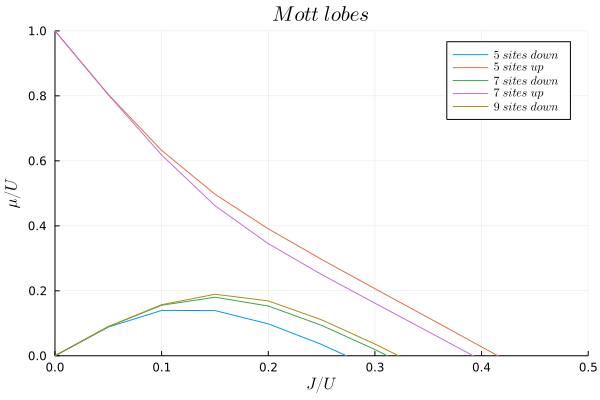

In [404]:
t = 0:0.05:0.50
plot!(t,(lowerbound-lowerboundminus) , xlabel =L"J/U", ylabel=L"\mu/U", title =L"Mott~lobes", label =L"9~sites~down", xlims=(0, 0.5), ylims=(0,1))
#savefig("plotofchemsBH.png")

In [405]:
plot!(t,(lowerboundplus-lowerbound) , xlabel =L"J/U", ylabel=L"\mu/U", title =L"Mott~lobes", label =L"9~sites~up", xlims=(0, 0.50), ylims=(0,1))
savefig("plotofchems1BHexact.png")

In [66]:
lowerboundplus-lowerbound

11-element Vector{Float64}:
  0.9999999999999991
  0.6059842937448173
  0.36619682725496205
  0.19100253618831786
  0.016290966134201224
 -0.1633305767585198
 -0.3470428434628259
 -0.5337997743476306
 -0.7228270185778864
 -0.9135811492959611
 -1.1056774634090605

In [62]:
lowerboundminus

11-element Vector{Float64}:
  1.1513820495981375e-15
 -0.1606331975152811
 -0.7627104228027402
 -1.5862471366038133
 -2.4830649439283627
 -3.413308990775874
 -4.362305423767726
 -5.323106573015003
 -6.291905963031886
 -7.26641205970059
 -8.245150431831433

In [24]:
lowerboundminus

11-element Vector{Float64}:
  -3.4498723916297116e-16
  -1.0288422832543223
  -3.0583381842117983
  -5.32088541231896
  -7.660092989594746
 -10.035674409147804
 -12.43180986171004
 -14.840833856222462
 -17.25852638228468
 -19.682353055392028
 -22.11069182001052

In [7]:
#variance = Vector{Float64}()  
ChemTunRelation = Vector{Float64}()
for t in 0:0.005:0.20, μ in 0:0.01:1
    J=t
    U=1
    diagscomp = [];
    for j in 1:D 
        sumsdeocup = []; 
        for k in 1:M
        push!(sumsdeocup, valdiags(k, v[j], M))
        end  
        push!(diagscomp, sum(sumsdeocup))    
    end    
    Vals = U*diagscomp
    Hint = spzeros(D,D)
    Hint[diagind(Hint)] = Vals; Hint  
    Hkin = spzeros(D, D)
    for j in 1:D
        for k in 1:M  
            for m in 1:M   
                if k == m 
                    continue 
                elseif creation_ann(k,m,v[j]) == 0 
                    continue  
                elseif abs(k-m)==2 
                    continue  
                #elseif(DictOfInds[tag(creation_ann( k, m , v[j] )[2],M)] < j)   #### up  part
                #     Hkin[DictOfInds[tag(creation_ann( k, m , v[j] )[2],M)], j] = -J*(creation_ann( k, m , v[j])[1]) 
                elseif(DictOfInds[tag(creation_ann( k, m , v[j] )[2],M)] > j) ### down  part
                     Hkin[DictOfInds[tag(creation_ann( k, m , v[j] )[2],M)], j] = -J*(creation_ann( k, m , v[j])[1]) 
                end   
            end   
        end   
    end   
    Hkin = Symmetric(Hkin, :L) 
    #Chemical potential 
    diagscomps = []
    for p in 1:D 
        sumsdeocups = [] 
        for l in 1:M
        push!(sumsdeocups, occupation(l, v[p]))
        end  
        push!(diagscomps, sum(sumsdeocups))    
    end    
    Vchem = -μ.*diagscomps
    Hch = spzeros(D, D)
    Hch[diagind(Hch)] = Vchem; Hch 
    H=Hkin+Hint+Hch
    Eval, Evec = eigs(H,nev=1,which=:SR, v0 = ones(D)) 
    push!(ChemTunRelation, Eval[1])
    #println(t, μ) 
    #Variance
    #v1 = matrixoccupation(3,D)
    #v2 = matrixoccupation(3,D)^2
    #push!(variance, sqrt(dot(G, v2*G) - (dot(G, v1*G))^2)) 
end        
#save("dataforeight.jld", "data", fconde)   ###save data of fconde
t = 0:0.005:0.20
μ = 0:0.01:1
xdat = repeat(t, inner=length(μ))
ydat = repeat(μ, outer=length(t)) 
zdat = ChemTunRelation  
#zData = [(ChemTunRelation) for i=0:0.5:20, j= 0:0.01:1]
#scatter(t , μ , color = zData)  
scatter(xdat, ydat, zdat)
#scatter(xdat, ydat, marker_z=zdat)#plot(t,fconde, xlabel =L"U/J", ylabel=L"f_c", title = "Fraction of condensate", label = "8 sites", xlims=(0, 20), ylims=(0,1))
#plot(t,variance, xlabel =L"\textrm{U/J}", ylabel=L"\textrm{\sigma_{i}}", title= "Variance", labels = "site 6" )  
#savefig("plot.png")
#plot(t, correlation, xlabel = "U/J", ylabel = "ρ⁽¹⁾")

LoadError: UndefVarError: D not defined

In [257]:
MM = 6
for j in 1:MM, k in 1:MM 
    if(abs(j-k)==(MM-1) || abs(j-k)==1 ) 
        println(j,k)  
    else 
        continue
    end  
end

12
16
21
23
32
34
43
45
54
56
61
65


In [219]:
#load("dataforeight.jld")["data"]

In [231]:
N

4

In [117]:
X = Diagonal(rand(1:3, 3))

3×3 Diagonal{Int64, Vector{Int64}}:
 2  ⋅  ⋅
 ⋅  3  ⋅
 ⋅  ⋅  3

In [120]:
4 .*X

3×3 Diagonal{Int64, Vector{Int64}}:
 8   ⋅   ⋅
 ⋅  12   ⋅
 ⋅   ⋅  12